In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
products = pd.read_csv('Cung cap HV/Product_new.csv')
reviews = pd.read_csv('Cung cap HV/Review_new.csv')

### 1. Product

In [3]:
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [4]:
products.shape

(4373, 10)

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4373 non-null   int64  
 1   name         4373 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4373 non-null   float64
 4   price        4373 non-null   int64  
 5   list_price   4373 non-null   int64  
 6   brand        4373 non-null   object 
 7   group        4373 non-null   object 
 8   url          4373 non-null   object 
 9   image        4373 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 341.8+ KB


In [6]:
pd.options.display.float_format = '{:,.2f}'.format
products[['rating','price','list_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,"4,373.00",3.67,1.80,0.00,3.80,4.50,4.80,5.00
price,"4,373.00","2,763,501.13","5,544,076.83","7,000.00","150,000.00","487,000.00","2,680,000.00","62,690,000.00"
list_price,"4,373.00","3,893,684.92","7,900,791.25","12,000.00","279,000.00","790,000.00","3,590,000.00","82,990,000.00"


Nhận xét:
* rating có giá trị trong khoảng 0-5
* price có giá trị trong khoảng 7,000 - 62,690,000

### 1.1 Giá bán

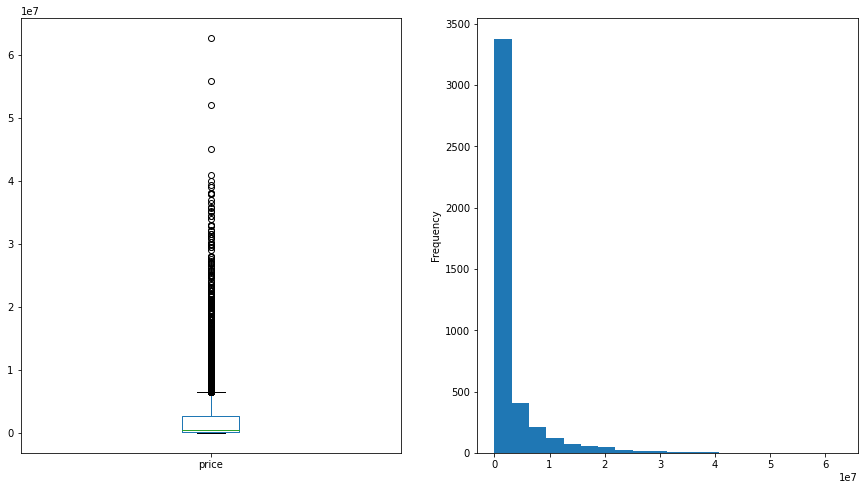

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
products.price.plot(kind='box', ax=ax[0])
products.price.plot(kind='hist', bins=20, ax=ax[1])
plt.show()

Nhận xét:
* Dữ liệu có rất nhiều outliers
* Mức giá tập trung chủ yếu trong khoảng (0, 600000)

### 1.2 Thương hiệu

In [8]:
# Number of products groupped by brand
brands = products.groupby('brand')['item_id'].count().sort_values(ascending=False)
brands

brand
OEM          1115
Samsung       199
Panasonic      96
LG             96
Sony           95
             ... 
Klink           1
Kplus           1
LB-LINK         1
LBLink          1
\tOEM           1
Name: item_id, Length: 521, dtype: int64

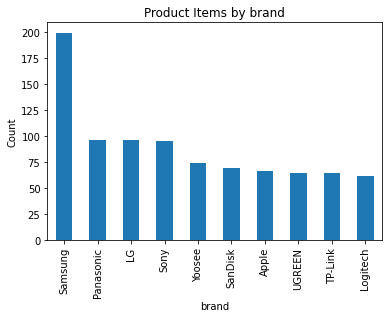

In [9]:
# Top 10 brands that have the highest number of product id
brands[1:11].plot(kind='bar')
plt.ylabel('Count')
plt.title('Product Items by brand')
plt.show()

Nhận xét: 
* Top 10 brands có số lượng mã sản phẩm cao nhất là: Samsung, LG, Panasonic, Sony, Yoosee, SanDisk, Apple, URGREEN, TP-Link, Logitech
* Trong đó, Samsung là brand có số lượng mã sản phẩm cao nhất 
* Các brands như LG, Panasonic, Sony có số lượng mã sản phẩm tương đương nhau

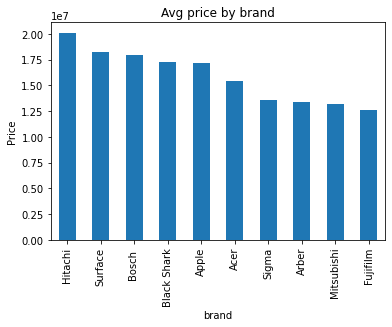

In [10]:
### Visulize price based on brands
price_by_brand = products.groupby(by="brand").mean()["price"]
price_by_brand.sort_values(ascending=False)[:10].plot(kind="bar")
plt.ylabel("Price")
plt.title("Avg price by brand")
plt.show()

Nhận xét: 
* Thương hiệu Hitachi có giá trung bình cao nhất
* Theo sau đó là một vài thương hiệu tiêu biểu như: Surface, Bosch, Black Shark, Apple

### 1.3 Rating

In [11]:
products.rating.value_counts(ascending=True)

1.80      1
2.60      1
2.10      1
1.30      2
2.20      2
2.80      4
2.30      4
3.10      5
2.70      6
2.50      7
2.00      7
3.20      9
3.40     15
3.30     17
3.60     23
1.00     24
3.50     40
3.90     49
3.00     52
3.70     54
3.80     61
4.10     77
4.20    125
4.40    191
4.00    204
4.90    220
4.30    233
4.50    326
4.60    361
4.70    427
4.80    442
5.00    593
0.00    790
Name: rating, dtype: int64

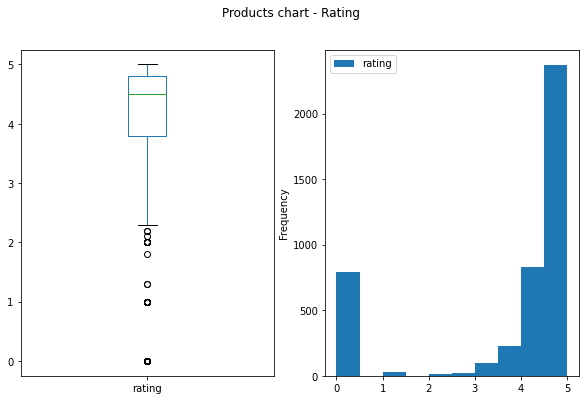

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
fig.suptitle('Products chart - Rating')
products[['rating']].plot(kind='box', ax=ax[0])
products[['rating']].plot(kind='hist', ax=ax[1])
plt.show()

Nhận xét:
* Mức rating dao động trong khoảng (2, 5]. Bên cạnh đó vẫn tồn tại các điểm outliers thể hiện cho mức rating nhỏ hơn 2
* Mức rating tập trung chủ yếu ở 4,5
* Có một số sản phẩm có rating bằng 0

In [14]:
# Look at product rating in reviews of customers
avg_rating_customer = reviews.groupby(by="product_id").mean()["rating"].to_frame().reset_index()
avg_rating_customer.rename({'rating':'avg_rating'}, axis=1, inplace=True)
avg_rating_customer.head()

,product_id,avg_rating
0,54665,4.61
1,55897,4.63
2,104180,4.48
3,116897,4.24
4,122012,4.49


In [15]:
products = products.merge(avg_rating_customer, left_on="item_id", right_on="product_id", how="left")

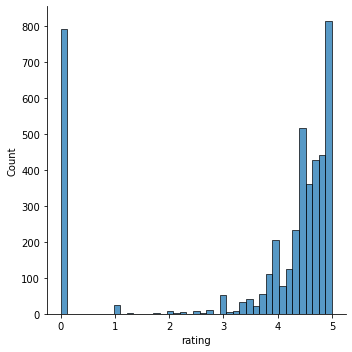

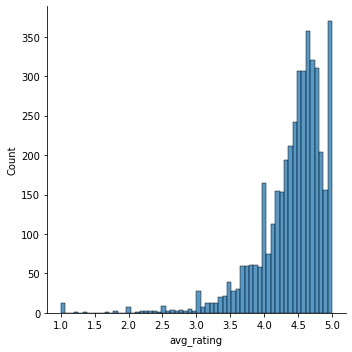

In [16]:
sns.displot(products, x='rating', kind='hist')
sns.displot(products, x='avg_rating', kind='hist')
plt.show()

Nhận xét:
* Rating các sản phẩm được review bởi khách hàng đều lớn hơn 0
* Các sản phẩm có mức rating bằng 0 vì thiếu dữ liệu

### 2. Review

In [17]:
reviews.head()

,customer_id,product_id,name,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [18]:
reviews.shape

(363439, 6)

In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363439 entries, 0 to 363438
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  363439 non-null  int64 
 1   product_id   363439 non-null  int64 
 2   name         363009 non-null  object
 3   rating       363439 non-null  int64 
 4   title        363411 non-null  object
 5   content      165161 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.6+ MB


In [20]:
print(f'Tìm thấy {reviews.shape[0]} đánh giá cho {reviews.product_id.unique().shape[0]} sản phẩm')

Tìm thấy 363439 đánh giá cho 4214 sản phẩm


In [21]:
reviews.rating.value_counts(ascending=True)

2      7099
1     16619
3     20656
4     60826
5    258239
Name: rating, dtype: int64

<AxesSubplot:ylabel='Frequency'>

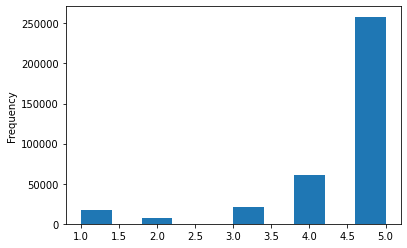

In [22]:
reviews.rating.plot(kind='hist')

Nhận xét: Phần lớn các sản phẩm có rating bằng 5 => sản phẩm được đánh giá rất tích cực

### 2.1 Top 20 products had the highest number of reviews

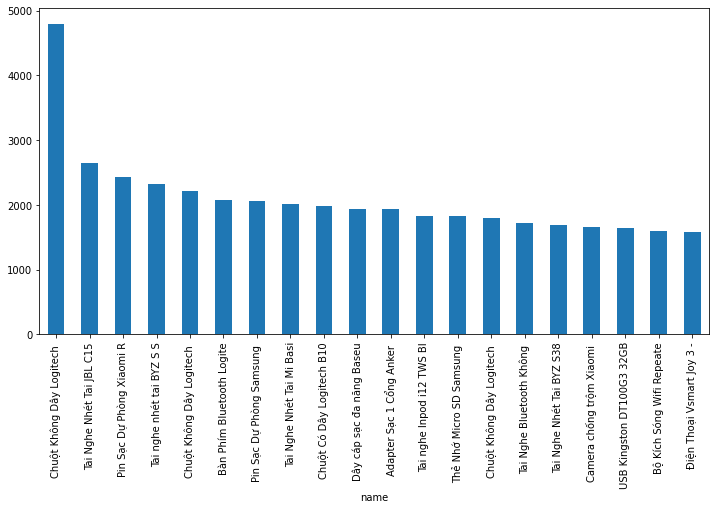

In [23]:
plt.figure(figsize=(12,6))
top_products = reviews.groupby('product_id').count()['customer_id'].sort_values(ascending=False)[:20]
top_products.index = products[products.item_id.isin(top_products.index)]['name'].str[:25]
top_products.plot(kind='bar')
plt.show()

Nhận xét:
* Các sản phẩm được reviews nhiều nhất chủ yếu là phụ kiện điện thoại máy tính
* Chuột không dây Logitech được đánh giá nhiều nhất

### 2.2 Top 20 cusotmers who reviewed the most

In [24]:
top_rating_customer = reviews.groupby('customer_id').count()['product_id'].sort_values(ascending=False)[:20]

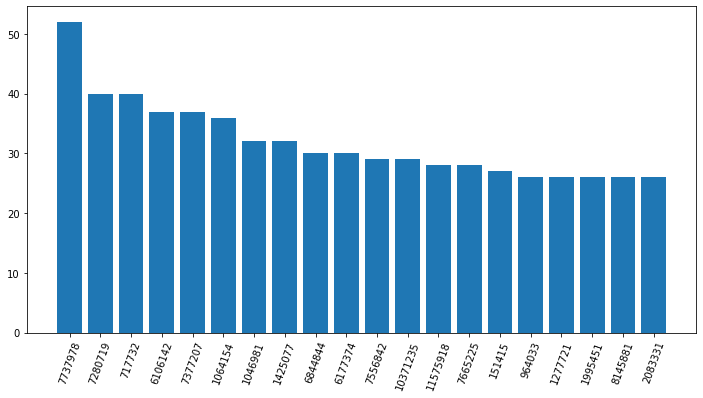

In [25]:
plt.figure(figsize=(12,6))
plt.bar(x=[str(x) for x in top_rating_customer.index], height=top_rating_customer.values)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
* Khách hàng có id = 7737978 thực hiện đánh giá nhiều nhất
* Các khách hàng khác có xu hướng tương đương nhau theo từng nhóm